<h1 align="center"> Homework 8 Programming Task</h1>
<h3 align="center"> IST 5520: Data Methodologies in Python, 2018 Spring </h3>
<h3 align="center"> Student: XXX </h3>

**Instruction:**

Complete the following tasks (2 points for each task and question, 20 points in total). You can add additional lines if necessary.

In [4]:
# Import modules and set inline mode
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

# Task: Principal Component Analysis of Iris Dataset

(1) Prepare Iris Dataset

Load the iris dataset from sklearn.datasets package. Print out its description. Convert it into a pandas DataFrame.


In [5]:
iris = datasets.load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [6]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['Class']= iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


(2) Convert the value of Class variable

Use the following strings to represent class value:

- 0: 'Iris-Setosa'
- 1: 'Iris-Versicolour'
- 2: 'Iris-Virginica'

In [39]:
iris_df.Class.replace({0:'Iris-Setosa',1:'Iris-Versicolour',2:'Iris-Virginica'}, inplace=True)

In [40]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,3.6,1.4,0.2,Iris-Setosa
5,5.4,3.9,1.7,0.4,Iris-Setosa
6,4.6,3.4,1.4,0.3,Iris-Setosa
7,5.0,3.4,1.5,0.2,Iris-Setosa
8,4.4,2.9,1.4,0.2,Iris-Setosa
9,4.9,3.1,1.5,0.1,Iris-Setosa


(3) Normalize dataset

Standardize all columns except Class.

(4) Principal component analysis with full components

In [41]:
data_norm = scale(iris_df.loc[:,'sepal length (cm)':'petal width (cm)'])

In [42]:
pd.DataFrame(data_norm).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,150.0,-1.468455e-15,1.00335,-1.870024,-0.900681,-0.052506,0.674501,2.492019
1,150.0,-1.657933e-15,1.00335,-2.438987,-0.587764,-0.124958,0.569251,3.114684
2,150.0,-1.515825e-15,1.00335,-1.568735,-1.227541,0.336266,0.762759,1.786341
3,150.0,-8.052818e-16,1.00335,-1.444450,-1.181504,0.133226,0.790591,1.710902


(5) Draw a scree plot to show the cumulative variance explained along the number of principal components.

In [43]:
pca1 = PCA(n_components=4)
pca1.fit(data_norm)


PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
#The amount of variance that each PC explains
var = pca1.explained_variance_ratio_
#Cumulative Variance explains
var1 = np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)
print(var1)

[ 72.77  95.8   99.48 100.  ]


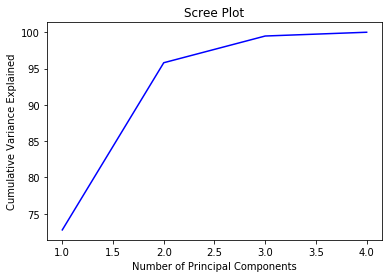

In [46]:
var1 = pd.DataFrame(var1, index=np.arange(1,5))
plt.plot(var1,color='blue')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.savefig('scree_plot.png',dpi=100,bbox_inches='tight')

**Question 1**: What is the least number of components we need to keep in order to keep 95% variance of the original predictors?

Your answer:

We can see that if we choose a 2-component solution, the variance would be > 95%. 2 orthogonal (uncorrelated) components will be able to keep more than 95% variance of the 4 variables in the original dataset.


(6) Principal component analysis with two componenets.

In [47]:
pca2 = PCA(n_components=2)
pca2.fit(data_norm)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(7) Run a correlation analysis on the dimension-reducted dataset.

In [48]:
data_pca2 = pca2.fit_transform(data_norm)

data_pca2 = pd.DataFrame(data_pca2)
data_pca2.columns = ["PC"+str(i) for i in range(1,3)]

data_pca2.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [49]:
data_pca2.corr()

,PC1,PC2
PC1,1.000000e+00,6.457818e-17
PC2,6.457818e-17,1.000000e+00


**Question 2**: What conclusion do you get from the correlation analysis?

Your answer:

We can see that the pairwise correlations between two components are close to zeros. This means that all these components are orthogonal (not correlated). There is no multicollinearity among principal components


(8) Plot iris class onto the reduced two-dimensional space.

With the two-component solution, draw a scatter plot to show the reduced dataset. Actually, one popular use of PCA is to reduce dimension to two, thus allowing plot a multi-dimensional data on a 2D space.

The scatter plot should use "Principal Component 1" as x axis, "Principal Component 2" as y axis. Use different colors to represent points for different classes of Iris flower.

A sample scatter plot can be found here:
https://mst.instructure.com/files/783452/download?download_frd=1

You can refer to "Data Summarization and Visualization" jupyter notebook section 4.6 for scatter plot.

In [50]:
pd.DataFrame(pca2.components_.transpose(),
             index=iris_df.loc[:,'sepal length (cm)':'petal width (cm)'].columns,
             columns=["PC"+str(i) for i in range(1,3)])

,PC1,PC2
sepal length (cm),0.522372,0.372318
sepal width (cm),-0.263355,0.925556
petal length (cm),0.581254,0.021095
petal width (cm),0.565611,0.065416


Text(0,0.5,'Component 2')

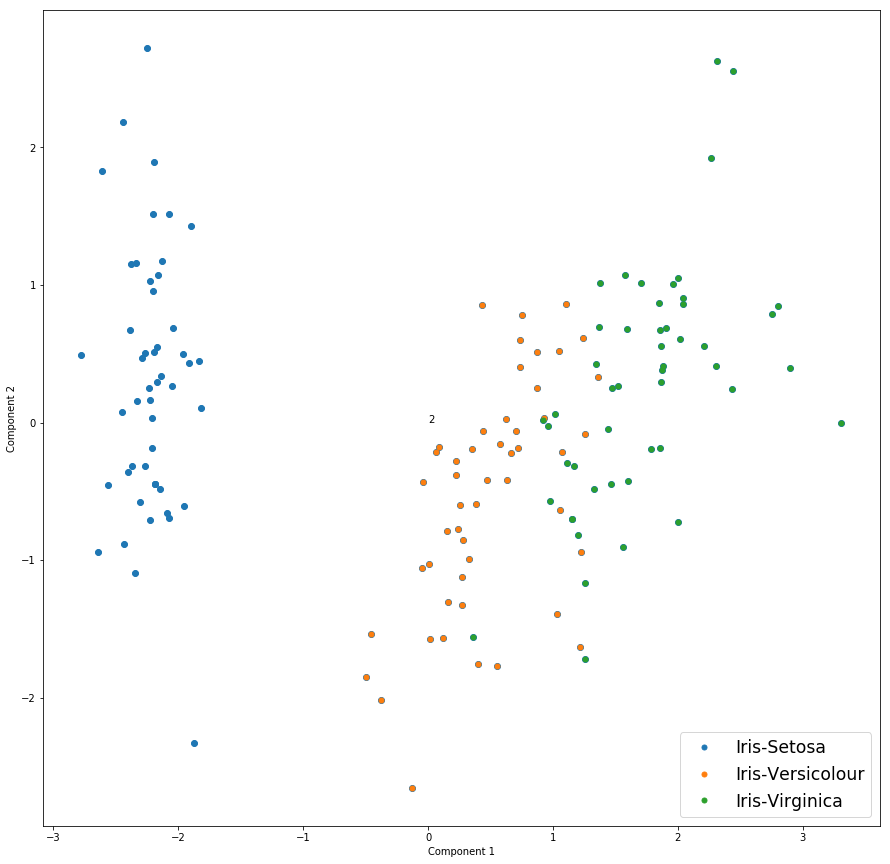

In [73]:
data_pca2['Class'] = iris_df['Class']
grouped = data_pca2.groupby('Class')
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(data_pca2['PC1'], data_pca2['PC2'])
ax.annotate(2,(0,0))
for name, group in grouped:
   ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=5, label=name)
ax.legend(['Iris-Setosa','Iris-Versicolour','Iris-Virginica'],loc='lower right',fontsize='xx-large')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
